In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Attempt 1

In [2]:
# define the path of the binary file
file_path = "C://Users/josep/Downloads/usrp_samples_0dB.dat"

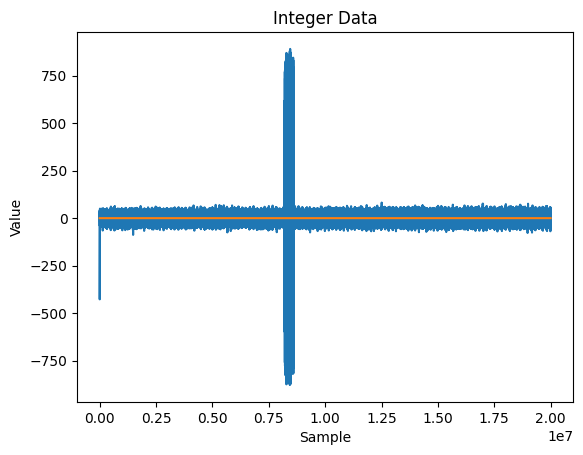

In [3]:
# define the length of the complex shorts in bytes
short_length = 4

# define the number of complex shorts to read
num_shorts = 10000000

# read the first num_shorts complex shorts from the binary file as a byte string
with open(file_path, 'rb') as f:
    binary_data = f.read(short_length * num_shorts)

# convert the byte string to a numpy array of complex shorts
complex_data = np.frombuffer(binary_data, dtype=np.short)

# separate the real and imaginary parts of the complex data
real_data = np.real(complex_data)
imag_data = np.imag(complex_data)

# combine the real and imaginary parts into a single array of integers
int_data = np.stack((real_data, imag_data), axis=-1).astype(np.int32)

# plot the integer data
plt.plot(int_data)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Integer Data')
plt.show()

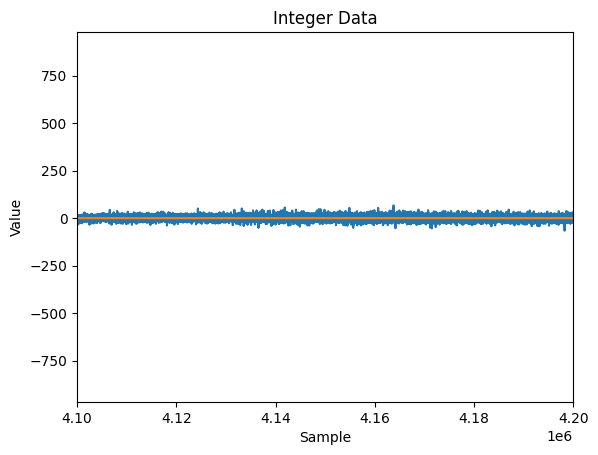

In [4]:
# plot the integer data
plt.plot(int_data)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Integer Data')
plt.xlim(0.41e7, 0.42e7)
plt.show()

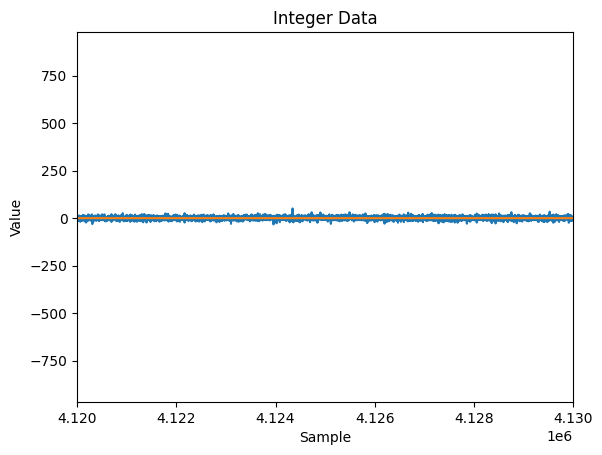

In [5]:
# plot the integer data
plt.plot(int_data)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Integer Data')
plt.xlim(0.412e7, 0.413e7)
plt.show()

# Attempt 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define the path of the binary file
file_path = "C://Users/josep/Downloads/usrp_samples_0dB.dat"

In [26]:
def read_binary_file(file_path, num_bytes):
    # Open the binary file for reading
    with open(file_path, 'rb') as f:
        # Read the specified number of bytes
        binary_data = f.read(num_bytes)     
        # Convert the binary data to a NumPy array
        np_array = np.frombuffer(binary_data, dtype=np.byte)     
    return np_array

def read_binary_file_int16(file_path, num_chunks):
    # Open the binary file for reading
    with open(file_path, 'rb') as f:
        # Read the specified number of 16-bit chunks (2 bytes per chunk)
        binary_data = f.read(num_chunks * 2)     
        # Convert the binary data to a NumPy array of int16s
        np_array = np.frombuffer(binary_data, dtype=np.int16)    
    return np_array


def convert_byte_array_to_int(byte_array):
    # Combine every two elements of the byte array into a single 16-bit binary number
    combined_array = np.zeros(len(byte_array)//2, dtype=np.int16)
    for i in range(len(combined_array)):
        combined_array[i] = np.int16(byte_array[2*i]) << 8 | np.int16(byte_array[2*i+1])   
    return combined_array

def print_int16_array_as_binary(int16_array, num_elements_to_print):
    # Loop through the specified number of elements in the array
    for i in range(num_elements_to_print):
        # Get the i-th element in the array and convert it to binary
        binary_str = format(int16_array[i], '016b')
        # Print the binary string on a new line
        print(binary_str)

def convert_to_complex(int16_array):
    # Reshape the int16 array into a 2D array with shape (N/2, 2)
    reshaped_array = int16_array.reshape((-1, 2))
    # Convert the reshaped array to a complex dtype NumPy array
    complex_array = reshaped_array[:, 0] + 1j * reshaped_array[:, 1]
    return complex_array

In [38]:
int16_array = read_binary_file_int16(file_path, 10000000)
signal = convert_to_complex(int16_array)

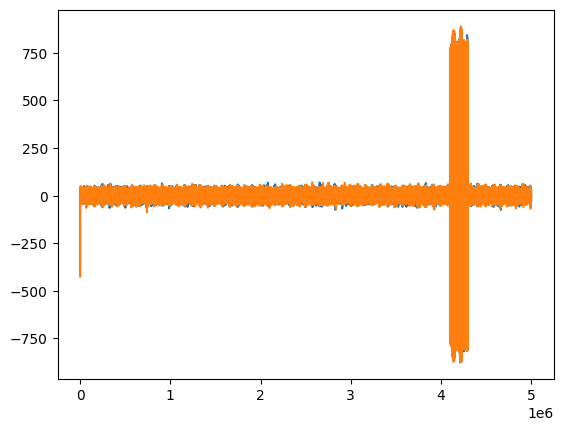

In [39]:
plt.plot(np.real(signal))
plt.plot(np.imag(signal))

(4122000.0, 4124000.0)

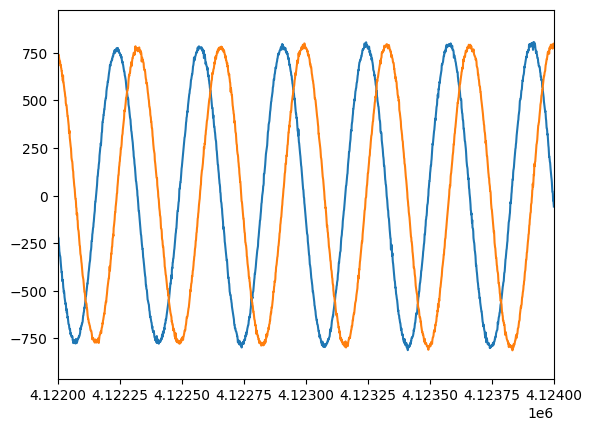

In [37]:
plt.plot(np.real(signal))
plt.plot(np.imag(signal))
plt.xlim(0.4122e7, 0.4124e7)

In [20]:
a = np.array([1,2,1,2,1,2,1,2,1,2])
b = a.reshape((-1,2))
print(a)
print(b)

[1 2 1 2 1 2 1 2 1 2]
[[1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]]
